In [0]:
import os
import sys
import pandas
from google.colab import drive
from keras.callbacks import ModelCheckpoint
from keras.models import  Sequential
from keras.layers import  Dense, Activation
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [0]:
drive.mount('/content/gdrive/')

root_path = '/content/gdrive/My Drive/Colab Notebooks/nn-homework1/pima'
sys.path.append(root_path)

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
data = pandas.read_csv(os.path.join(root_path, 'pima-indians-diabetes.data.csv')).values
x_raw = data[:, 0:-1]
y_raw = data[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x_raw, y_raw, test_size = .2)

In [0]:
checkpoint_name = "weights.epoch-{epoch:02d}.hdf5"
best_name = "weights.best.hdf5"
filepath = os.path.join(root_path, "Model/")

best_callback = ModelCheckpoint(filepath + best_name, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
checkpoint_callback = ModelCheckpoint(filepath + checkpoint_name, monitor='val_acc', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)

In [0]:
# hyper parameters
epochs = 100
batch_size = 16

# make the model
model = Sequential()

# hidden layer 1
model.add(Dense(12, input_dim=len(x_train[0])))
model.add(Activation('relu'))

# hidden layer 2
model.add(Dense(8))
model.add(Activation('relu'))

# output layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=['accuracy'],
)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 12)                108       
_________________________________________________________________
activation_10 (Activation)   (None, 12)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 104       
_________________________________________________________________
activation_11 (Activation)   (None, 8)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 9         
_________________________________________________________________
activation_12 (Activation)   (None, 1)                 0         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(
    x_train, y_train,
    batch_size = batch_size, epochs = epochs,
    validation_data = (x_test, y_test),
    callbacks=[checkpoint_callback, best_callback]
)

Train on 613 samples, validate on 154 samples
Epoch 1/100
613/613 [==============================] - 0s 625us/step - loss: 10.3571 - acc: 0.3491 - val_loss: 10.4557 - val_acc: 0.3442

Epoch 00001: val_acc improved from -inf to 0.34416, saving model to /content/gdrive/My Drive/Colab Notebooks/nn-homework1/pima/Model/weights.best.hdf5
Epoch 2/100
613/613 [==============================] - 0s 83us/step - loss: 10.3332 - acc: 0.3491 - val_loss: 10.4563 - val_acc: 0.3442

Epoch 00002: val_acc did not improve from 0.34416
Epoch 3/100
613/613 [==============================] - 0s 84us/step - loss: 10.3146 - acc: 0.3491 - val_loss: 10.4704 - val_acc: 0.3377

Epoch 00003: val_acc did not improve from 0.34416
Epoch 4/100
613/613 [==============================] - 0s 80us/step - loss: 10.3075 - acc: 0.3507 - val_loss: 10.4362 - val_acc: 0.3377

Epoch 00004: val_acc did not improve from 0.34416
Epoch 5/100
613/613 [==============================] - 0s 125us/step - loss: 6.3198 - acc: 0.4927 - val_

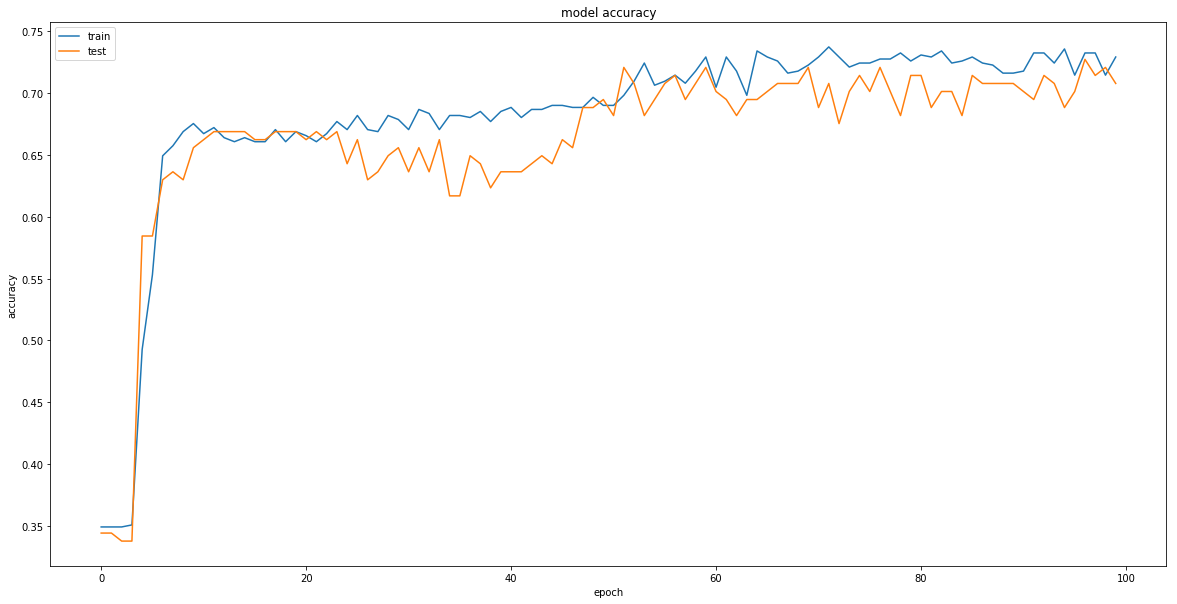

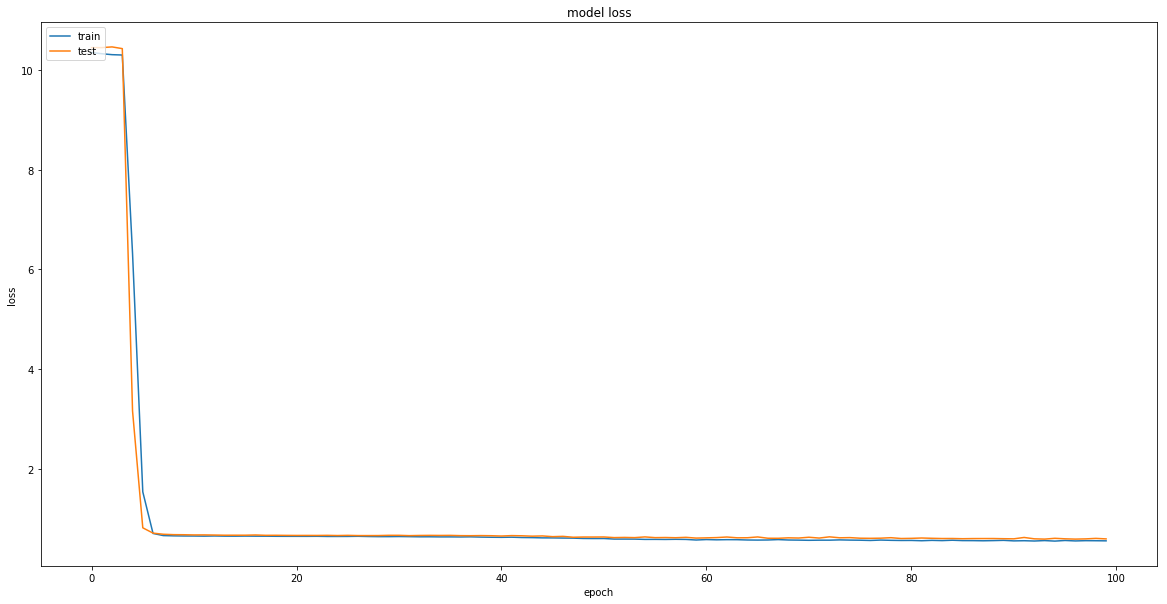

In [0]:
# plot accuracy
plt.figure(figsize=(20, 10))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(figsize=(20, 10))
# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model.load_weights(filepath + "weights.best.hdf5")
scores = model.evaluate(x_test, y_test, verbose=0)
print('accuracy:', scores[1] * 100)

accuracy: 72.7272731917245
